## Imports

The necessary packages are imported.  

In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import randint
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score

The dataset is loaded from Kaggle. 

In [3]:
employee_data = "HR_comma_sep.csv"
df0 = pd.read_csv(employee_data)
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

**The data type of each column is checked.**

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Descriptive statistics of all the numerical columns.**

In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**The dataset is checked for null and duplicate values.**

In [6]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df0.duplicated().sum()

3008

In [8]:
df_duplicates = df0[df0.duplicated()]
df_duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


**Duplicate rows are dropped from the dataset.**

In [9]:
df1 = df0.copy()
df1 = df1.drop_duplicates(keep="first")
df1.shape

(11991, 10)

**Column headers with spelling mistakes are renamed and all headers are presented in snake_case.**

In [10]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [42]:
df1 = df1.rename(columns = {'average_montly_hours': 'average_monthly_hours',
                           'Work_accident': 'work_accident',
                           'Department': 'department'})
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0


The salary column is explored.

In [12]:
df1["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

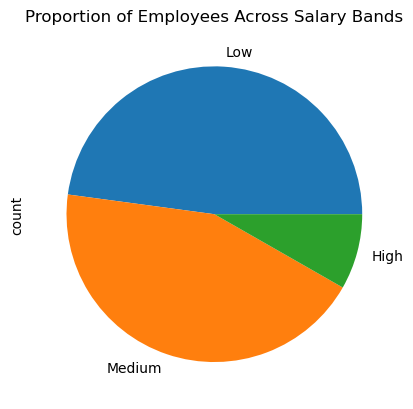

In [13]:
custom_labels = ['Low', 'Medium', 'High'] 
df1['salary'].value_counts().plot(kind='pie', labels = custom_labels)
plt.title("Proportion of Employees Across Salary Bands")
plt.show()

**The 'salary' column is label encoded by order.**

In [14]:
salary_map = {
    'low': 0,
    'medium': 1,
    'high': 2
}

df1['salary'] = df1['salary'].map(salary_map)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [15]:
df1['satisfaction_level'].mean()

0.6296580768910016

In [16]:
df1.groupby(['salary'])['satisfaction_level'].mean()

salary
0    0.622655
1    0.634723
2    0.643343
Name: satisfaction_level, dtype: float64

In [17]:
df1.groupby(['salary'])['average_monthly_hours'].mean()

salary
0    200.439199
1    200.587341
2    200.067677
Name: average_monthly_hours, dtype: float64

In [18]:
df1.groupby(['department'])['satisfaction_level'].mean()

department
IT             0.634016
RandD          0.627176
accounting     0.607939
hr             0.621947
management     0.631995
marketing      0.634770
product_mng    0.629825
sales          0.631349
support        0.634822
technical      0.627937
Name: satisfaction_level, dtype: float64

In [19]:
df1.groupby(['department'])['average_monthly_hours'].mean()

department
IT             200.638320
RandD          201.291066
accounting     200.877617
hr             199.371048
management     201.529817
marketing      199.487370
product_mng    198.893586
sales          200.242050
support        200.627128
technical      201.115419
Name: average_monthly_hours, dtype: float64

**Boxplot to check for outliers in the Tenure of employees.**

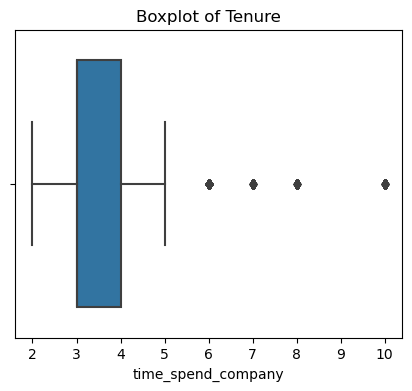

In [20]:
plt.figure(figsize = (5,4))
sns.boxplot(x=df1["time_spend_company"])
plt.title('Boxplot of Tenure')
plt.show()

In [21]:
percentile25 = df1['time_spend_company'].quantile(0.25)

percentile75 = df1['time_spend_company'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]
print("Number of rows in the data containing outliers in `time_spend_company`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `time_spend_company`: 824


In [22]:
df1.groupby(['left'])['satisfaction_level'].mean()

left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64

In [23]:
df1.groupby(['left'])['average_monthly_hours'].mean()

left
0    198.94270
1    208.16223
Name: average_monthly_hours, dtype: float64

C:\Users\ritoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Counts of Employees who stayed/left by Salary')

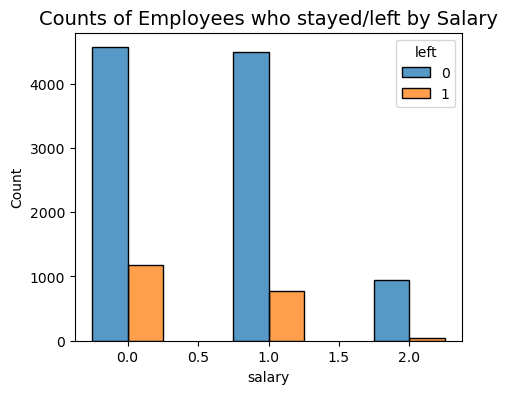

In [25]:
plt.figure(figsize=(5,4))
sns.histplot(data=df1, x='salary', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Counts of Employees who stayed/left by Salary', fontsize=14)

C:\Users\ritoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


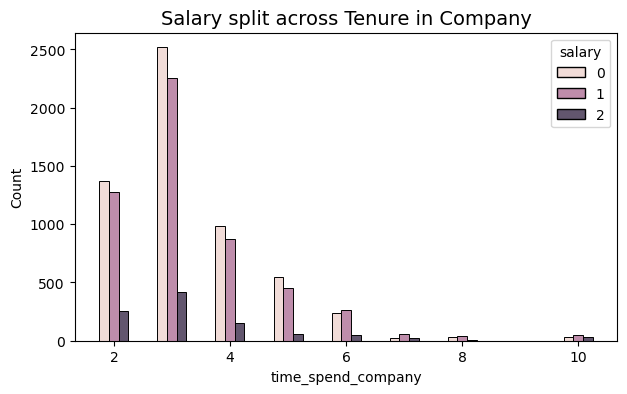

In [26]:
plt.figure(figsize=(7,4))
sns.histplot(data=df1, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=[0, 1, 2], multiple='dodge', shrink=.5)
plt.xticks(rotation='horizontal')
plt.title('Salary split across Tenure in Company', fontsize=14)
plt.show()

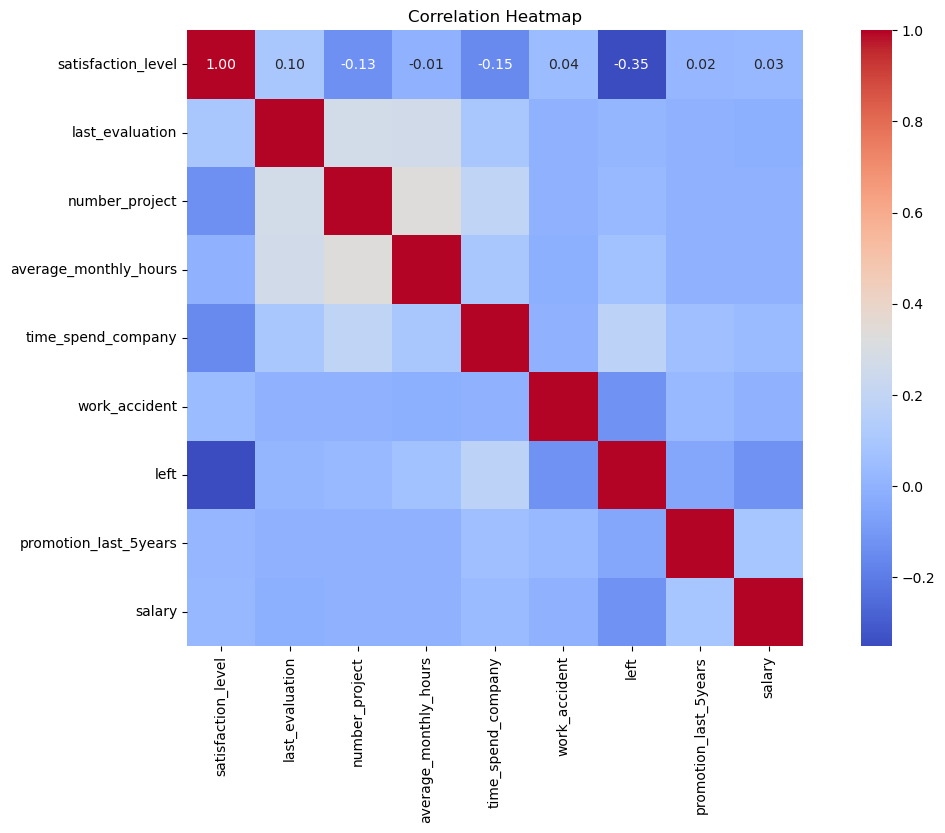

In [27]:
corr = df1.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
df1["promotion_last_5years"].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [29]:
df1.groupby(["promotion_last_5years"])["average_monthly_hours"].mean()

promotion_last_5years
0    200.505260
1    198.630542
Name: average_monthly_hours, dtype: float64

In [39]:
df1.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

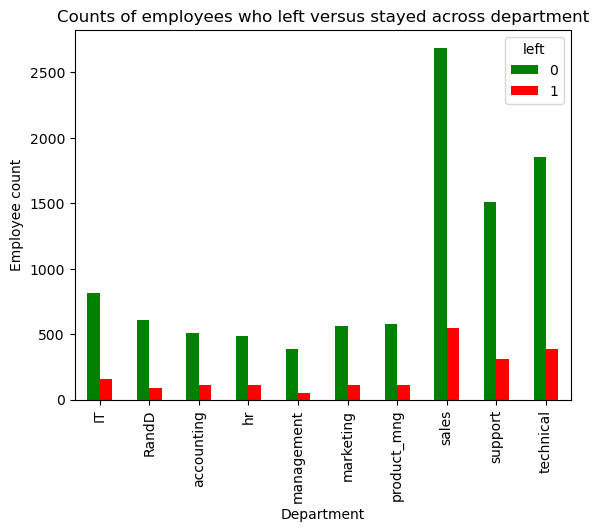

In [36]:
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='gr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

**The 'department' column is converted to numeric.**

In [46]:
df2 = df1.copy()
df2 = pd.get_dummies(df2, dtype=int, drop_first=False)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
df2.shape

(11991, 19)

## Logistic Regression Model

In [52]:
df3 = df2[(df2['time_spend_company']>= lower_limit) & (df2['time_spend_company']<= upper_limit)]
df3.shape

(11167, 19)

**The X and y variables are defined.**

In [54]:
y = df3["left"]
X = df3.drop("left", axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


**Dataset is split into 75% training and 25% test data.**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape

(8375, 18)

**The classifier is fit to the training data and predicted values are obtained.**

In [74]:
log_clf = LogisticRegression(max_iter=500, random_state=42).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

**A confusion matrix is plotted to check for precision and recall.**

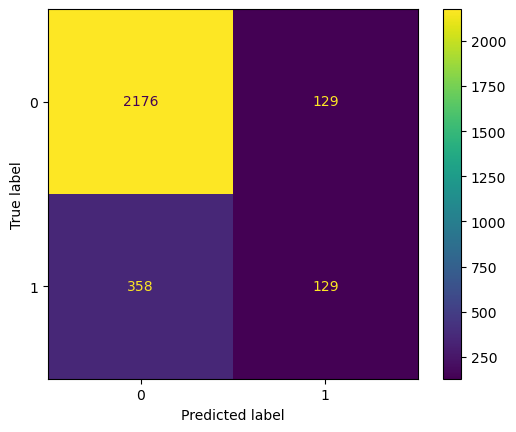

In [75]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

**Checking for Class imbalance in the target variable.**

In [77]:
df3["left"].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is a 85% - 15% split among the target variable and so it can be said that the data is not perfectly balanced, although it is not too imbalanced.Therefore, resampling is avoided at this point.

**A Classification Report is generated to check the performance of the model.** 

In [78]:
target_names = ['Predicted to not leave', 'Predicted to leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

Predicted to not leave       0.86      0.94      0.90      2305
    Predicted to leave       0.50      0.26      0.35       487

              accuracy                           0.83      2792
             macro avg       0.68      0.60      0.62      2792
          weighted avg       0.80      0.83      0.80      2792



The model achieved a precision score of 80% and a recall score of 83%. Although if it is more important to predict whether an employee would leave the company, then the scores are a bit low.

## Decision Tree Classifier

In [79]:
y = df2["left"]
X = df2.drop("left", axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape

(8993, 18)

**A grid search is performed to check for best parameters to run the model.**

In [81]:
dec_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1,2,3,4,5],
             'min_samples_split': [2, 4, 6, 10]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(dec_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [82]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 17.5 s
Wall time: 17.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 10]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [83]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [86]:
tree1.best_score_

0.968910850268976

**Table of Results**

In [87]:
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [88]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.963198,0.922352,0.942266,0.981208,0.968911


## Random Forest Classifier

In [101]:
rf = RandomForestClassifier(random_state=42)
cv_params = {'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'max_features': ['sqrt', 'log2']
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf1 = RandomizedSearchCV(rf, param_distributions=cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [102]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 59.7 s
Wall time: 1min


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174E7B71810>,
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174E7B70690>},
                   refit='roc_auc',
                   scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [103]:
rf1.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 89}

In [104]:
rf1.best_score_

0.9816344564012759

In [105]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.984917,0.91365,0.947918,0.98332,0.981634


In [108]:
df3 = df2.drop("satisfaction_level", axis=1)
df3.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
df3["overworked"] = df3["average_monthly_hours"]
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. It may be defined being overworked is working more than 175 hours per month on an average.e.

In [110]:
df3['overworked'] = (df3['overworked'] > 175).astype(int)

df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [112]:
df3 = df3.drop("average_monthly_hours", axis=1)
df3.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Decision Tree Classifier 2

In [113]:
y = df3["left"]
X = df3.drop("left", axis=1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape

(8993, 17)

In [115]:
dec_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1,2,3,4,5],
             'min_samples_split': [2, 4, 6, 10]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree2 = GridSearchCV(dec_clf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [116]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 14.3 s
Wall time: 14.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 10]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [117]:
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [118]:
tree2.best_score_

0.9578468326773255

In [119]:
tree2_cv_results = make_results('decision tree 2 cv', tree2, 'auc')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree 2 cv,0.886223,0.902263,0.894022,0.964416,0.957847


In [120]:
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.963198  0.922352  0.942266  0.981208  0.968911
                model  precision    recall        F1  accuracy       auc
0  decision tree 2 cv   0.886223  0.902263  0.894022  0.964416  0.957847


Some of the scores fell but the model still performs well even without the excluded columns. 

## Random Forest Classifier 2

In [121]:
rf = RandomForestClassifier(random_state=42)
cv_params = {'n_estimators': randint(50, 500),
    'max_depth': randint(5, 20),
    'max_features': ['sqrt', 'log2']
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf2 = RandomizedSearchCV(rf, param_distributions=cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [122]:
rf2.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174E7A3B010>,
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000174EA4D3FD0>},
                   refit='roc_auc',
                   scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [123]:
rf2.best_params_

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 465}

In [124]:
rf2.best_score_

0.9686662181953419

In [125]:
rf2_cv_results = make_results('random forest 2 cv', rf2, 'auc')
rf2_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest 2 cv,0.917926,0.866807,0.891315,0.964861,0.968666


In [126]:
print(rf1_cv_results)
print(rf2_cv_results)

              model  precision   recall        F1  accuracy       auc
0  random forest cv   0.984917  0.91365  0.947918   0.98332  0.981634
                model  precision    recall        F1  accuracy       auc
0  random forest 2 cv   0.917926  0.866807  0.891315  0.964861  0.968666


Again, the scores fell but the model still performs well even without the excluded columns.

### Most important features for the Decision Tree model.

In [127]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.320083
number_project,0.295734
time_spend_company,0.262275
overworked,0.116152
salary,0.001914
department_IT,0.001443
department_technical,0.000913
department_accounting,0.000563
department_support,0.000236
department_sales,0.000160


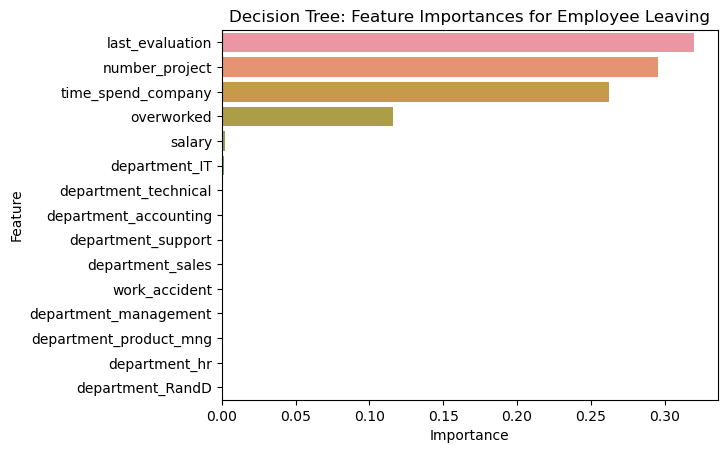

In [128]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Most important features for the Random Forest model.

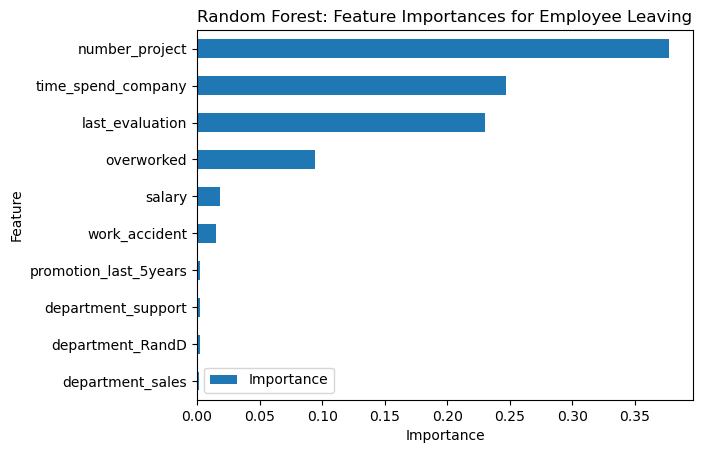

In [129]:
feat_impt = rf2.best_estimator_.feature_importances_

ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

## Predictions of the Decision Tree Classifier

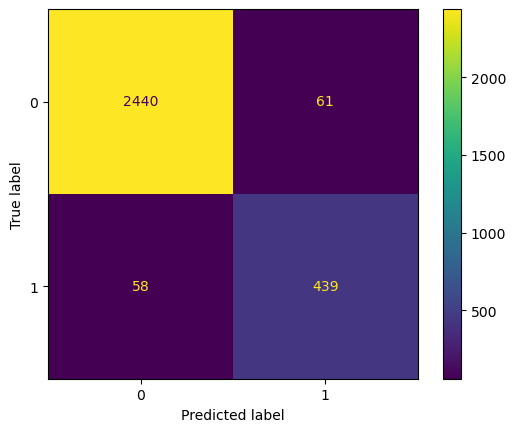

In [130]:
preds = tree2.best_estimator_.predict(X_test)
cm_tree2 = confusion_matrix(y_test, preds, labels=tree2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree2,
                             display_labels=tree2.classes_)
disp.plot()

## Predictions of the Random Forest Classifier

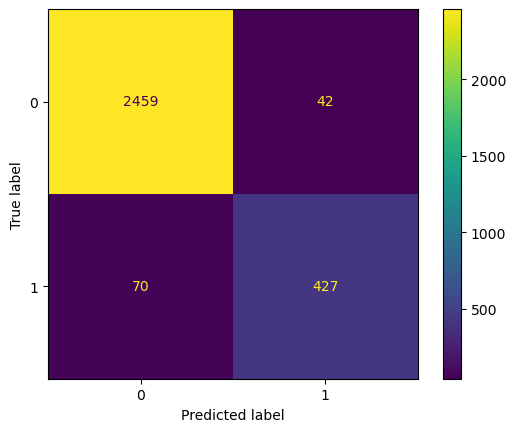

In [131]:
preds = rf2.best_estimator_.predict(X_test)
cm_rf2 = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf2,
                             display_labels=rf2.classes_)
disp.plot()

## Outcomes 

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholder   <br>

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per mort.  e effort.